In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import ast
import warnings

# Configuration for plotting and warnings
sns.set(context='notebook', font_scale=1.1, style='ticks', rc={'figure.figsize': (8, 3), 'figure.facecolor': 'none', 'axes.facecolor': 'none'})
plt.set_loglevel('WARNING')
plt.rcParams.update({'lines.markeredgewidth': 1})
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")

### Settings

In [26]:
BASE_FIGURE_PATH = "figures/"

### Load benchmarking results

In [58]:
"""
WAYMAX
"""

df_waymax_speed_without_obs = pd.read_csv('waymax_speed_03_1720.csv')
df_waymax_speed_without_obs['Compute obs.'] = False

df_waymax_with_obs = pd.read_csv('waymax_speed_04_0944_wi_obs_rtx_4080.csv')
df_waymax_with_obs['Compute obs.'] = True

# Metadata
df_waymax_metadata = pd.read_csv('waymax_metadata_bs_32.csv')

df_waymax_speed = pd.concat([df_waymax_speed_without_obs])

"""
GPUDRIVE
"""
df_gdrive_speed_rtx = pd.read_csv('gpudrive_speed_03_2002_rtx.csv', index_col=False) # random-actors

df_gdrive_speed_rtx['Compute obs.'] = True

df_gdrive_speed_a100 = pd.read_csv('gpudrive_speed_04_1055.csv', index_col=False) # random-actors

df_gdrive_speed_a100['Compute obs.'] = True

# Combine
df_gdrive_speed = pd.concat([df_gdrive_speed_rtx, df_gdrive_speed_a100])
df_gdrive_speed.reset_index(drop=True, inplace=True)

df_gdrive_metadata = pd.read_csv('gpudrive_metadata_bs_1024.csv')

In [62]:
df_gdrive_speed_rtx

,simulator,device_name,device_mem,actors,batch_size (num envs),avg_time_per_reset (ms),avg_time_per_step (ms),all_agent_fps (throughput),val_agent_fps (goodput),total_steps,total_resets,tot_step_time (s),tot_reset_time (s),val_agent_frames,tot_agent_frames,Compute obs.
0,GPUDrive,Quadro RTX 8000,46080.0,random,1,0.004819,0.747496,1.712384e+05,2.809380e+04,80.0,80.0,0.059800,0.000386,1680.0,10240.0,True
1,GPUDrive,Quadro RTX 8000,46080.0,random,2,0.008699,1.137531,2.250489e+05,4.835034e+04,80.0,80.0,0.091002,0.000696,4400.0,20480.0,True
2,GPUDrive,Quadro RTX 8000,46080.0,random,4,0.017092,1.742792,2.937815e+05,1.182011e+05,80.0,80.0,0.139423,0.001367,16480.0,40960.0,True
3,GPUDrive,Quadro RTX 8000,46080.0,random,8,0.033912,2.124646,4.819626e+05,1.887373e+05,80.0,80.0,0.169972,0.002713,32080.0,81920.0,True
4,GPUDrive,Quadro RTX 8000,46080.0,random,16,0.068229,2.439511,8.395126e+05,3.672867e+05,80.0,80.0,0.195161,0.005458,71680.0,163840.0,True
5,GPUDrive,Quadro RTX 8000,46080.0,random,32,0.136983,3.033948,1.350056e+06,5.497787e+05,80.0,80.0,0.242716,0.010959,133440.0,327680.0,True
6,GPUDrive,Quadro RTX 8000,46080.0,random,64,0.273308,3.920129,2.089727e+06,8.178302e+05,80.0,80.0,0.313610,0.021865,256480.0,655360.0,True
7,GPUDrive,Quadro RTX 8000,46080.0,random,128,0.546309,5.961344,2.748374e+06,1.162657e+06,80.0,80.0,0.476907,0.043705,554480.0,1310720.0,True
8,GPUDrive,Quadro RTX 8000,46080.0,random,256,1.103902,8.693838,3.769106e+06,1.689127e+06,80.0,80.0,0.695507,0.088312,1174800.0,2621440.0,True
9,GPUDrive,Quadro RTX 8000,46080.0,random,512,2.192450,15.509436,4.225557e+06,1.974475e+06,80.0,80.0,1.240755,0.175396,2449840.0,5242880.0,True


### Section 1

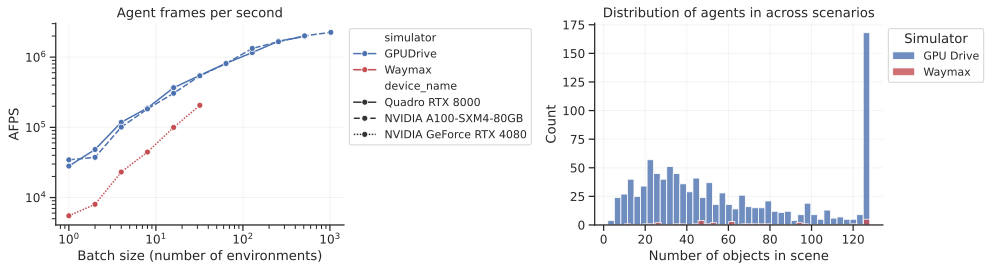

In [66]:
df_all = pd.concat([df_gdrive_speed, df_waymax_with_obs])

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Performance
sns.lineplot(data=df_all, x='batch_size (num envs)', y='val_agent_fps (goodput)', style='device_name', hue='simulator', marker='o', ax=axs[0], palette=['b', 'r'])

# Distribution of agents
sns.histplot(ast.literal_eval(df_gdrive_metadata[df_gdrive_metadata['num_envs (BS)'] == 1024]['num_valid_objects_per_scene (dist)'].values[0]), color='b', label='GPU Drive', bins=40, alpha=0.8, ax=axs[1]) 
sns.histplot(ast.literal_eval(df_waymax_metadata[df_waymax_metadata['num_envs (BS)'] == 32]['num_valid_objects_per_scene (dist)'].values[0]), color='r', label='Waymax', bins=40, alpha=0.8, ax=axs[1], legend=True)

axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[0].set_xlabel('Batch size (number of environments)')
axs[0].set_ylabel('AFPS')
axs[1].set_xlabel('Number of objects in scene')
axs[0].set_title('Agent frames per second')
axs[1].set_title('Distribution of agents in across scenarios')
axs[0].grid(True, alpha=0.2)
axs[1].grid(True, alpha=0.2)
axs[0].legend(fontsize=11, loc='best', bbox_to_anchor=(1, 1))
axs[1].legend(title='Simulator', fontsize=11, loc='best', bbox_to_anchor=(1, 1))

plt.tight_layout()
sns.despine()

plt.savefig('gpudrive_sim_perf_0604.pdf', bbox_inches = 'tight')

In [ ]:
### Time per step and reset

#TODO: 1) add waymax dist over multiple scens; 2) make plots above separate; 3) use percentage of agents in scene


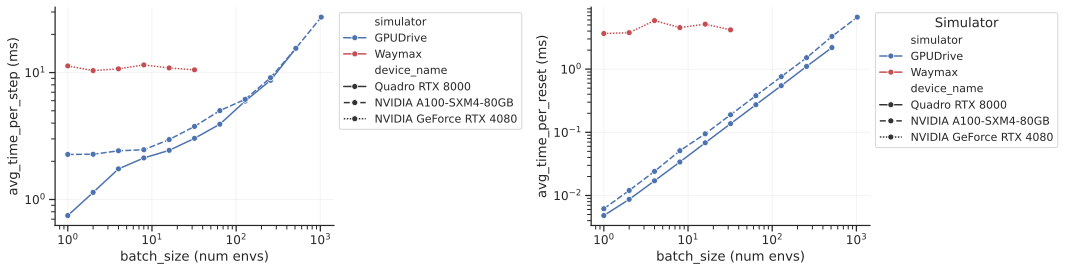

In [57]:
df_all_time = pd.concat([df_gdrive_speed, df_waymax_speed])

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

# Performance
sns.lineplot(data=df_all, x='batch_size (num envs)', y='avg_time_per_step (ms)', style='device_name', hue='simulator', marker='o', ax=axs[0], palette=['b', 'r'])

sns.lineplot(data=df_all, x='batch_size (num envs)', y='avg_time_per_reset (ms)', style='device_name', hue='simulator', marker='o', ax=axs[1], palette=['b', 'r'])

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

axs[0].grid(True, alpha=0.2)
axs[1].grid(True, alpha=0.2)
axs[0].legend(fontsize=11, loc='best', bbox_to_anchor=(1, 1))
axs[1].legend(title='Simulator', fontsize=11, loc='best', bbox_to_anchor=(1, 1))

plt.tight_layout()
sns.despine()

### Waymax comparison

In [14]:
#df_waymax_speed_without_obs = pd.read_csv('waymax_speed_04_0935_no_obs_rtx_4080.csv')
df_waymax_speed_without_obs = pd.read_csv('waymax_speed_03_1720.csv')
df_waymax_speed_without_obs['Type'] = 'No observations comp.'
df_waymax_with_obs = pd.read_csv('waymax_speed_04_0944_wi_obs_rtx_4080.csv')
df_waymax_with_obs['Type'] = 'Compute observations vmap'
df_waymax_with_obs_jit = pd.read_csv('waymax_speed_04_1022_wi_obs_jit_rtx_4080.csv')
df_waymax_with_obs_jit['Type'] = 'Compute observations vmap + jit'


df_waymax_all = pd.concat([df_waymax_speed_without_obs, df_waymax_with_obs, df_waymax_with_obs_jit])

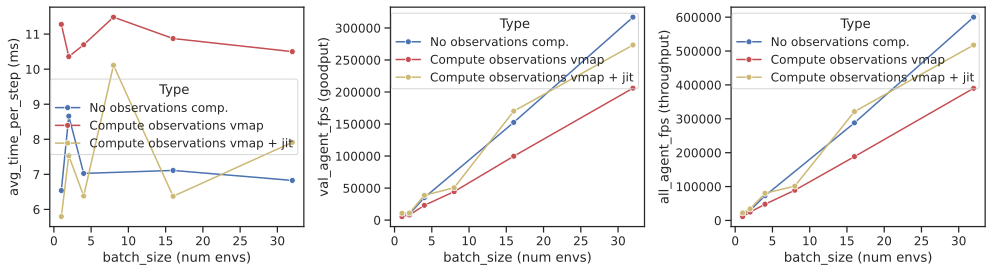

In [16]:

fig, axs = plt.subplots(1, 3, figsize=(14, 4))

# Performance   
sns.lineplot(data=df_waymax_all, x='batch_size (num envs)', y='avg_time_per_step (ms)', hue='Type', marker='o', ax=axs[0], palette=['b', 'r', 'y'])

sns.lineplot(data=df_waymax_all, x='batch_size (num envs)', y='val_agent_fps (goodput)', hue='Type', marker='o', ax=axs[1], palette=['b', 'r', 'y'])


sns.lineplot(data=df_waymax_all, x='batch_size (num envs)', y='all_agent_fps (throughput)', hue='Type', marker='o', ax=axs[2], palette=['b', 'r', 'y'])

plt.tight_layout()

### Comparison

Text(0, 0.5, ' ')

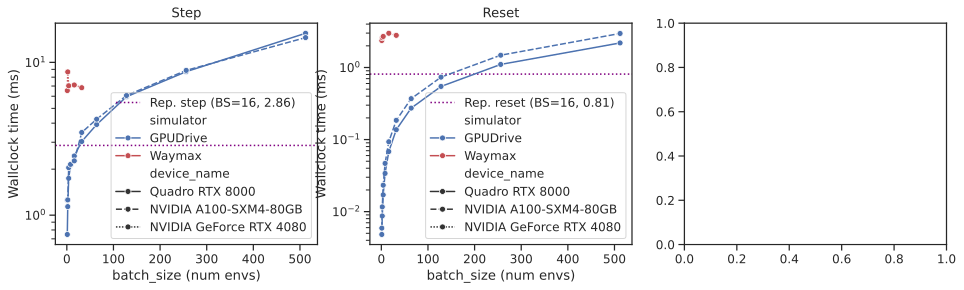

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

#fig.suptitle(f'Waymax / GPU Drive runtime benchmark. GPU Drive actors = {df_gdrive_speed.actors[0]}', fontsize=13, y=1.02)   

axs[0].axhline(y=2.86, color='purple', linestyle=':', label='Rep. step (BS=16, 2.86)',)
sns.lineplot(data=df_all, x='batch_size (num envs)', y='avg_time_per_step (ms)', style='device_name', palette=['b', 'r', 'g'], hue='simulator', marker='o', ax=axs[0], color='b',)
axs[0].set_yscale('log')
axs[0].set_title('Step')

axs[1].axhline(y=0.81, color='purple', linestyle=':', label='Rep. reset (BS=16, 0.81)')
axs[1].set_title('Reset')
axs[1].set_yscale('log')
sns.lineplot(data=df_all, x='batch_size (num envs)', y='avg_time_per_reset (ms)', palette=['b', 'r'], style='device_name', hue='simulator', marker='o', ax=axs[1], color='b',)

axs[0].set_ylabel('Wallclock time (ms)')
axs[1].set_ylabel('Wallclock time (ms)')
axs[2].set_ylabel(' ')

# sns.lineplot(data=df_all, x='batch_size (num envs)', y='val_agent_fps (goodput)', style='device_name', palette=['b', 'r'], hue='simulator', marker='o', ax=axs[2], color='k', legend=True)
# #sns.lineplot(data=df_all, x='batch_size (num envs)', y='all_agent_fps (throughput)', style='Compute observations', hue='simulator', marker='o', ax=axs[2], palette=['b', 'r'], legend=False)

axs[2].set_title('Frames per second (throughput)')
axs[0].grid(True, alpha=0.2)
axs[1].grid(True, alpha=0.2)
axs[2].grid(True, alpha=0.2)
axs[2].get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

axs[0].legend(fontsize=11, loc='best', bbox_to_anchor=(1, 1))
axs[1].legend(fontsize=11, loc='best', bbox_to_anchor=(1, 1))

plt.tight_layout()
sns.despine()

### Meta data

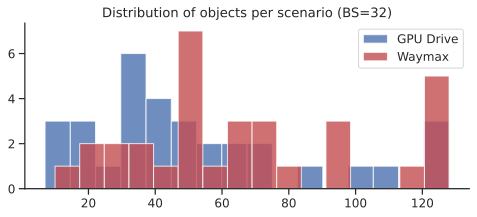

In [26]:
plt.hist(ast.literal_eval(df_gdrive_metadata[df_gdrive_metadata['num_envs (BS)'] == 32]['num_valid_objects_per_scene (dist)'].values[0]), color='b', label='GPU Drive', bins=16, alpha=0.8)
plt.hist(ast.literal_eval(df_waymax_metadata[df_waymax_metadata['num_envs (BS)'] == 32]['num_valid_objects_per_scene (dist)'].values[0]), color='r', label='Waymax', bins=16, alpha=0.8)
plt.title('Distribution of objects per scenario (BS=32)')
plt.legend()
sns.despine()

### GPU Drive conditions

- Does stepping with experts or random actors (controlling up to `max_num_objects = 128`) make a difference?

In [61]:
df_gdrive_expert = pd.read_csv('gpudrive_speed_13_1234_expert.csv') # expert-actors
df_gdrive_rand = pd.read_csv('gpudrive_speed_13_1220.csv') # random-actors

df_gdrive_cond = pd.concat([df_gdrive_expert, df_gdrive_rand])

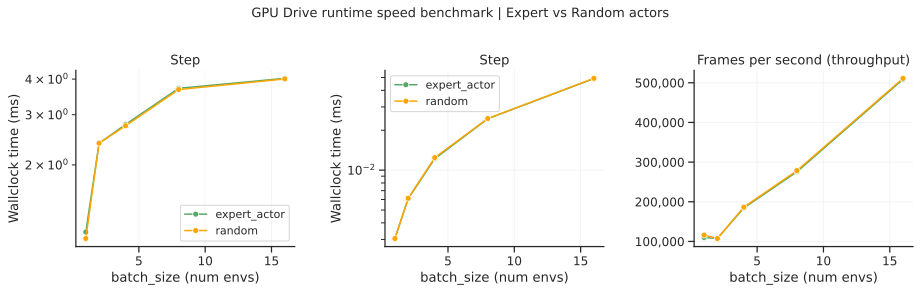

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(13, 4))

fig.suptitle('GPU Drive runtime speed benchmark | Expert vs Random actors', fontsize=13, y=1.02)

sns.lineplot(data=df_gdrive_cond, x='batch_size (num envs)', y='avg_time_per_step (ms)', palette=['g', 'orange'], hue='actors', marker='o', ax=axs[0], color='b',)
axs[0].set_yscale('log')
axs[0].set_ylabel('Wallclock time (ms)')
axs[0].set_title('Step')

sns.lineplot(data=df_gdrive_cond, x='batch_size (num envs)', y='avg_time_per_reset (ms)', palette=['g', 'orange'], hue='actors', marker='o', ax=axs[1], color='b',)
axs[1].set_yscale('log')
axs[1].set_ylabel('Wallclock time (ms)')
axs[1].set_title('Step')

sns.lineplot(data=df_gdrive_cond, x='batch_size (num envs)', y='all_agent_fps (throughput)', palette=['g', 'orange'], hue='actors', marker='o', ax=axs[2], color='k', legend=False)
axs[2].set_ylabel(' ')
axs[2].set_title('Frames per second (throughput)')

axs[0].grid(True, alpha=0.2)
axs[1].grid(True, alpha=0.2)
axs[2].grid(True, alpha=0.2)
axs[2].get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

axs[0].legend(fontsize=11, loc='best',) #bbox_to_anchor=(1, 1))
axs[1].legend(fontsize=11, loc='best',) #bbox_to_anchor=(1, 1))

plt.tight_layout()
sns.despine()

### Waymax conditions

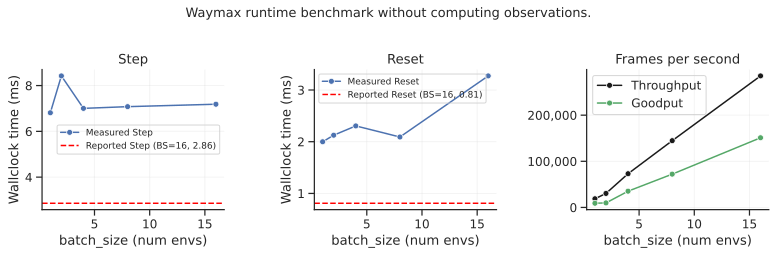

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(11, 3.5))

fig.suptitle('Waymax runtime benchmark without computing observations.', fontsize=13, y=1.02)   

sns.lineplot(data=df_waymax_speed_without_obs, x='batch_size (num envs)', y='avg_time_per_step (ms)', marker='o', ax=axs[0], color='b', label='Measured Step')
axs[0].axhline(y=2.86, color='red', linestyle='--', label='Reported Step (BS=16, 2.86)',)
axs[0].set_title('Step')

sns.lineplot(data=df_waymax_speed_without_obs, x='batch_size (num envs)', y='avg_time_per_reset (ms)', marker='o', ax=axs[1], color='b', label='Measured Reset')
axs[1].axhline(y=0.81, color='red', linestyle='--', label='Reported Reset (BS=16, 0.81)',)
axs[1].set_title('Reset')

axs[0].set_ylabel('Wallclock time (ms)')
axs[1].set_ylabel('Wallclock time (ms)')
axs[2].set_ylabel(' ')

sns.lineplot(data=df_waymax_speed_without_obs, x='batch_size (num envs)', y='all_agent_fps (throughput)', marker='o', ax=axs[2], color='k', label='Throughput')
sns.lineplot(data=df_waymax_speed_without_obs, x='batch_size (num envs)', y='val_agent_fps (goodput)', marker='o', ax=axs[2], color='g', label='Goodput')

axs[2].set_title('Frames per second')
axs[0].grid(True, alpha=0.2)
axs[1].grid(True, alpha=0.2)
axs[2].grid(True, alpha=0.2)
axs[2].get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axs[0].legend(fontsize=9, loc='best',) #bbox_to_anchor=(1, 1))
axs[1].legend(fontsize=9, loc='best',) #bbox_to_anchor=(1, 1))

plt.tight_layout()
sns.despine()   

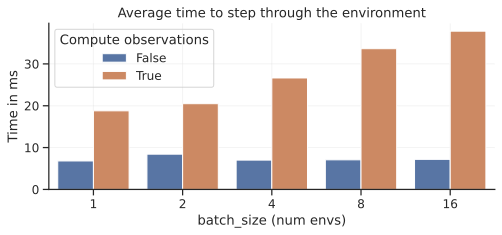

In [119]:
#df_waymax_speed[['batch_size (num envs)', 'avg_time_per_reset (ms)', 'avg_time_per_step (ms)', 'comp_obs']]

plt.title('Average time to step through the environment')
plt.ylabel('Time in ms')
sns.barplot(data=df_waymax_speed, x='batch_size (num envs)', y='avg_time_per_step (ms)', hue='Compute observations')
plt.grid(True, alpha=0.2)
sns.despine();

In [120]:
df_waymax_metadata

,sim_type,device_name,num_envs (BS),num_valid_objects_per_scene (dist)
0,Waymax,NVIDIA GeForce RTX 4080,1,[62]
1,Waymax,NVIDIA GeForce RTX 4080,2,"[62, 21]"
2,Waymax,NVIDIA GeForce RTX 4080,4,"[62, 21, 69, 95]"
3,Waymax,NVIDIA GeForce RTX 4080,8,"[62, 21, 69, 95, 128, 37, 52, 47]"
4,Waymax,NVIDIA GeForce RTX 4080,16,"[62, 21, 69, 95, 128, 37, 52, 47, 80, 128, 23,..."
